___

___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

2023-06-19 13:52:54.014325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 13:52:54.873376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [18]:
df = pd.read_csv('Data/Miles_Traveled.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

In [19]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [30]:
df.rename(columns={'TRFVOLUSM227NFWA':'Value'})

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


**TASK: Plot out the time series**

<Axes: xlabel='DATE'>

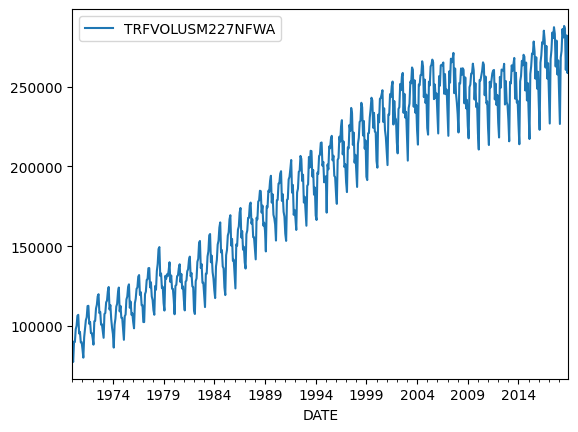

In [31]:
df.plot()

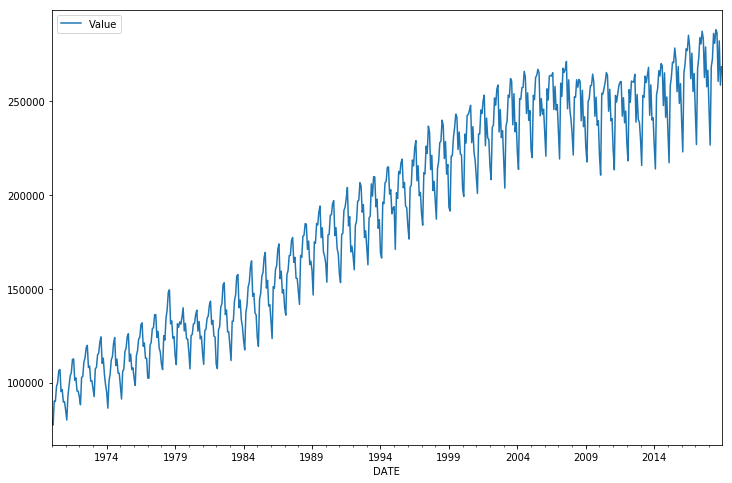

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [7]:
# CODE HERE

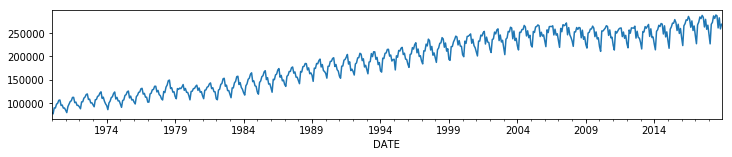

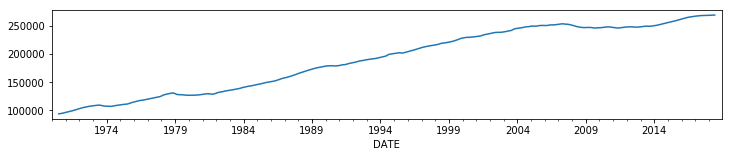

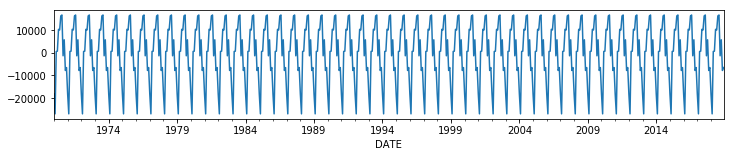

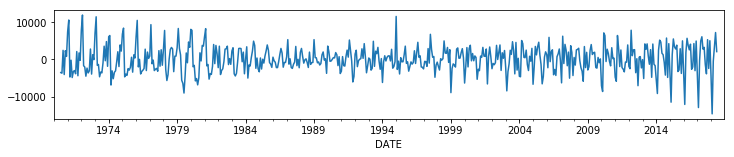

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
# CODE HERE

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [15]:
# CODE HERE

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [17]:
# CODE HERE

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [22]:
#CODE HERE

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [28]:
# CODE HERE

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [47]:
# CODE HERE

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [50]:
# CODE HERE

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [53]:
# CODE HERE

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [55]:
#CODE HERE

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [1]:
# CODE HERE

,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

In [2]:
# CODE HERE

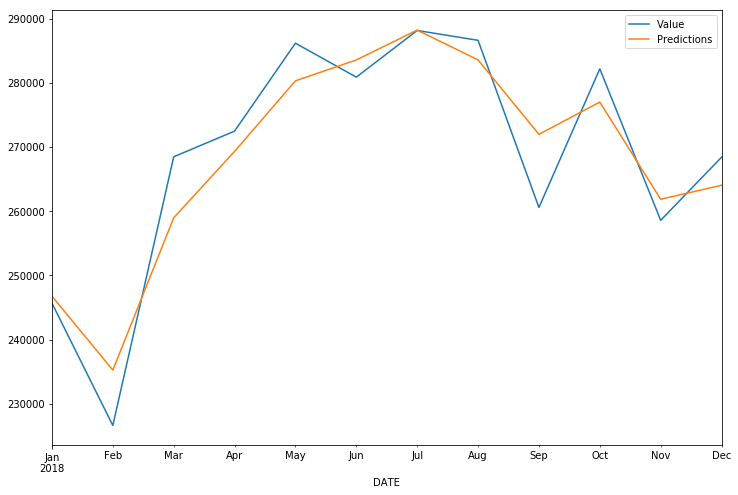

# Saving Models

**TASK: Optional, Save your model!**